<a href="https://colab.research.google.com/github/hakimozcan/Natural-Language-Processing/blob/main/computational_methods_for_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
#stats
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import cluster
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy  as np

#support
import re
import html
import datetime
import os
from os import listdir
from os.path import isfile, join
from pathlib import Path
import json
from os.path import basename
from zipfile import ZipFile
import string
import pickle

!pip install emoji
import emoji


#NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()


import spacy
from spacy.symbols import nsubj, VERB
nlp = spacy.load("en_core_web_sm")

from wordcloud import WordCloud

#LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim import corpora, models
from gensim.models import Phrases
from gensim.corpora import Dictionary


#Visualisation
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pprint import pprint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Task One (10 points)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Get data
df = pd.read_csv("/Q1_discussions.csv")
df.head()

,Unnamed: 0,title,type,year,post
0,0,Better Call Saul,linear,2017,Walter. And there the chain ends.
1,1,Better Call Saul,linear,2016,I love this show. But it's hard to argue again...
2,2,Better Call Saul,linear,2017,What am I missing? A lot of reference to ribs...
3,3,Better Call Saul,linear,2018,"Oh come on Mike, he's a good little boy."
4,4,Better Call Saul,linear,2017,Look again 👀


## Question 1.1

Based on the provided data, identify the most discussed show for each year.

In [ ]:
#Groupby posts with respect to year and title
df_new = df.groupby(['year', 'title'])['post'].count().reset_index()
df_new = pd.DataFrame(df_new).copy()
print(df_new)

    year            title  post
0   2011     Breaking Bad   588
1   2012     Breaking Bad  3208
2   2012     The Newsroom   134
3   2013     Breaking Bad  2627
4   2013   House of Cards     5
..   ...              ...   ...
59  2020            Ozark   865
60  2020       Succession     3
61  2020        The Crown    15
62  2020  The Mandelorian     1
63  2020      The Witcher   240

[64 rows x 3 columns]


In [ ]:
# Returns the most discussed show for each year.
df_new = df.groupby(['year', 'title'])['post'].count().reset_index()
df_new = df_new.groupby('year')['post', 'title'].max()
columns_titles = ["title", "post"] #Swap the title and post columns
df_new = df_new.reindex(columns=columns_titles)
print(df_new)

                title  post
year                       
2011     Breaking Bad   588
2012     The Newsroom  3208
2013     The Newsroom  2627
2014   True Detective   563
2015   True Detective  4559
2016  Stranger Things  6313
2017       Twin Peaks  3903
2018        The Crown  2427
2019   True Detective  1450
2020      The Witcher  1458


<ipython-input-91-a25b65efc615>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new = df_new.groupby('year')['post', 'title'].max()


## Question 1.2

Select a sub-sample of two shows that you are interested in. First,

*   Motivate your choice
*   State a hypothesis about the differences that you expect to find regarding how the shows are being discussed on Reddit.

### Hypothesis



Among all the TV shows, I only watched Game of Thrones and am inclined to watcht Stranger Things next. Since the questions does not ask for an academic motivation, this should be a sufficient reason to motivate my choice of these movies. Based on the previous analysis, Game of Thrones never received the highest amount of discussion posts whereas Stranger things  recieved the 6313 discussion posts in the year, 2016, it was premiered on Netflix. No other TV series in the data set received this amount discussion post in a single year. So, Stranger Things is popular and will probably continue to be popular. However, I claim that Games of Thrones will receive a higher number of discussion in 2019 as it had unexpeced tragic end.

In short, I hypothesize that Game of Thrones received a higher number of discussions posts than Stanger Things, despite its popularity, in 2019.

In [ ]:
df_selected = df[(df["title"].isin(["Game of Thrones", "Stranger Things"])) & (df["year"] == 2019)]
df_selected.head()

,Unnamed: 0,title,type,year,post
19130,19130,Game of Thrones,linear,2019,Dude the umber boy that was pinned to the wall...
19145,19145,Game of Thrones,linear,2019,Okay the episode was good i guess but i really...
19160,19160,Game of Thrones,linear,2019,Really?
19163,19163,Game of Thrones,linear,2019,"I think the drawing said dragon glass, and tra..."
19204,19204,Game of Thrones,linear,2019,Death stare ? I thought it kinda looked like t...


In [ ]:
df_new = df_selected.groupby(['title'])['post'].count().reset_index()
print(df_new)

             title  post
0  Game of Thrones   687
1  Stranger Things  1450


My hypothesis was negated, meaning the TV Show Stranger Things received higher discussion posts than Game of Thrones.

### Question 1.2.1 : The 20 most used adjectives in comments per show

Returns the 20 most used adjectives in comments for Games of Thrones

In [ ]:
# Extract rows for Games of Thrones
df_got = df[df.title == 'Game of Thrones']
df_got.head()

#First, convert the 'tweet' column into strings
df_got['post'] = df_got['post'].astype(str)

#Function for NLP for separating features (Spacy)
def do_nlp(x):
    doc = nlp(x)
    return doc

#Create new column with words separated
df_got['post_nlp'] = df_got['post'].apply(lambda x: do_nlp(x))

#Function to include only nouns
def include_features(x):
    include_features = ['ADJ'] #extract the nouns
    text = ' '.join([ent.text for ent in x if ent.pos_ in include_features])
    return text

df_got['features'] = df_got['post_nlp'].apply(lambda x: include_features(x))

# Clean up the texts (lowercase, remove symbols, numbers, stopwords etc.)
def clean_text(x):
    x = x.lower()
    x = x.translate(str.maketrans('', '', string.punctuation))
    # tokenize
    x = nltk.word_tokenize(x)
    x = [token for token in x if token not in stop_words]
    # lemmatization and pass string back
    x = ' '.join([lemmatizer.lemmatize(w) for w in x])
    return x

stop_words = stopwords.words('english')

df_got['features'] = df_got['features'].apply(lambda x: clean_text(x))

# Remove empty strings from the features column
df_got = df_got[df_got['features'] != '']

# Show the 20 most frequent words
from collections import Counter
tokenized_text = df_got['features'].values
word_counts = Counter(tokenized_text)
word_counts.most_common()[:20]

<ipython-input-94-abb466bf0769>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_got['post'] = df_got['post'].astype(str)
<ipython-input-94-abb466bf0769>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_got['post_nlp'] = df_got['post'].apply(lambda x: do_nlp(x))
<ipython-input-94-abb466bf0769>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

[('good', 152),
 ('dead', 101),
 ('last', 97),
 ('sure', 82),
 ('little', 76),
 ('best', 71),
 ('next', 71),
 ('first', 63),
 ('much', 62),
 ('right', 60),
 ('whole', 59),
 ('fucking', 59),
 ('bad', 50),
 ('great', 48),
 ('better', 45),
 ('happy', 44),
 ('true', 44),
 ('real', 42),
 ('old', 40),
 ('new', 39)]

Returns the 20 most used adjectives in comments for Stranger Things

In [ ]:
# Extract rows for Games of Thrones
df_st = df[df.title == 'Stranger Things']
df_st.head()

#First, convert the 'tweet' column into strings
df_st['post'] = df_st['post'].astype(str)

#Function for NLP for separating features (Spacy)
def do_nlp(x):
    doc = nlp(x)
    return doc

#Create new column with words separated
df_st['post_nlp'] = df_st['post'].apply(lambda x: do_nlp(x))

#Function to include only nouns
def include_features(x):
    include_features = ['ADJ'] #extract the nouns
    text = ' '.join([ent.text for ent in x if ent.pos_ in include_features])
    return text

df_st['features'] = df_st['post_nlp'].apply(lambda x: include_features(x))

# Clean up the texts (lowercase, remove symbols, numbers, stopwords etc.)
def clean_text(x):
    x = x.lower()
    x = x.translate(str.maketrans('', '', string.punctuation))
    # tokenize
    x = nltk.word_tokenize(x)
    x = [token for token in x if token not in stop_words]
    # lemmatization and pass string back
    x = ' '.join([lemmatizer.lemmatize(w) for w in x])
    return x

df_st['features'] = df_st['features'].apply(lambda x: clean_text(x))

# Remove empty strings from the features column
df_st = df_st[df_st['features'] != '']

# Show the 20 most frequent words
from collections import Counter
tokenized_text = df_st['features'].values
word_counts = Counter(tokenized_text)
word_counts.most_common()[:20]

<ipython-input-95-305f727f3d07>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_st['post'] = df_st['post'].astype(str)
<ipython-input-95-305f727f3d07>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_st['post_nlp'] = df_st['post'].apply(lambda x: do_nlp(x))
<ipython-input-95-305f727f3d07>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

[('good', 32),
 ('real', 21),
 ('bad', 19),
 ('great', 17),
 ('last', 16),
 ('first', 16),
 ('whole', 15),
 ('poor', 14),
 ('little', 14),
 ('right', 13),
 ('better', 11),
 ('best', 11),
 ('dead', 10),
 ('next', 10),
 ('old', 10),
 ('new', 9),
 ('sure', 9),
 ('perfect', 8),
 ('amazing', 8),
 ('fair', 7)]

Question 1.2.3 : Retrieve the most distinct words per show.

# Task Two (40 points)

The file Q2_tech_tweets.csv contains 300.000 tweets that mention either “China” or “India” in combination with the term “tech”, posted between 2010 and 2021. The data include the tweets, usernames, users mentioned in a tweet, date of posting and a range of interaction metrics (e.g., likes, replies). Your task is to explore how “tech” is framed differently in the Indian and Chinese contexts.

PLEASE NOTE: The file Q2_tech_tweets.csv (also .p) is about 700 MB.

The previous two sections (**TF-IDF & K-Means Clustering China** and **TF-IDF & K-Means Clustering India**) has analyzed tech tweets respectively in Chinese and Indian contexts using. The research goal was to find difference in terms of tech framing in both countries. The first difference is in the number topics clusters. In the Chinese context,

In [ ]:
# Get data
path = "/Q2_tech_tweets.csv"
df_tweet = pd.read_csv(path)
df_tweet.head()

## Quesiton 2.1

**With reference to the learning materials from this course, explain how "framing" is defined and operationalized in your analysis.**


Throughout this course, we have seen multiple interpretations of "framing". Having studied psychology a bit, I find the framing definition in lecture 2 slides the most intuitive. The slides refers to frames as the "contexts of interpretation" (Nguyen, 2022). This viewpoint fits well in this question, as it allows me to examine different contexts (e.g., China and India) and how tech is interpreted in these different contexts. Based on this definition, I defined my reserach objective as to examine how tech is interpreted differently in tweets that mentions China or India. Operationalizing this objective requires measurement validy (Baden et al., 2022, as cited in Liu & Zhang, 2012; Stalpouskaya, 2020, p. 14). To open up, I need to validly measure what I aim to measure. For this, I used K-Means Clustering and LDA models. Both models involve identifying specific keywords that are associated with a particular frames. Here, they identify what other concepts with which the word "tech" occur together in Chinese and Indian tweets. Assuming the framing of a concept is higly dependent on neighbour (context) words, these methods could prove quite valueable in exploring the framing of “tech” in the Indian and Chinese contexts.

## Question 2.2

Conducting a framing analysis with at least two different methods for (unsupervised) text analysis. Explain briefly how each method connects to **your overall research goals**. Ensure that you indicate how you set the key parameters for each method that you apply and justify your choices via commenting.

### TF-IDF & K-Means Clustering China

This section use tf-idf & k-means to analyze the tweets that mention China. Recall the overall research goal was to find how tech is discussed (framed) in Chinese and Indian seettings. TF-IDF & K-Means Clustering identifies helps us answer that questions by clustering topics which is definied as repeated co-occurance of terms (Nguyen, 2022). Condering that all the tweets are about tech, this methods allows us to find topics around the tech frame in Chinese context.

In [ ]:
# Only keep the tweets that contains the word "China"
# The code takes into account different variations of the word and case sensitivity.
china_df = df_tweet[df_tweet['tweet'].str.contains(r'\b(china|chinese)\b', case=False)]

# Print the tweets that contain the word "China" and its variations.
print("Tweets containing the word 'China':", len(china_df))

# Make sure that the tweets contains only the word "China"
# That's because the question implies that we are only interested in differences between how tech is framed in the countries.
china_df = china_df[~china_df['tweet'].str.contains(r'\b(india|indian)\b', case=False)]

# Print the tweets that contain only the word "China" and its variations.
print("Tweets containing only the word 'China':", len(china_df))

<ipython-input-97-d3e8ff819984>:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  china_df = df_tweet[df_tweet['tweet'].str.contains(r'\b(china|chinese)\b', case=False)]


Tweets containing the word 'China': 134333


<ipython-input-97-d3e8ff819984>:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  china_df = china_df[~china_df['tweet'].str.contains(r'\b(india|indian)\b', case=False)]


Tweets containing only the word 'China': 124042


In [ ]:
# There are more 120,000 tweets that mention China. It takes a long time to process this data.
# Even though I used Google Colab for this assignment, it failed a couple times to complete pre-prossing and other tasks.
# Therefore, I decided to take a sample from the data and proceed with that data.
# Select 30,000 random rows from the data frame, with a fixed random seed. 30,000 is a random choice but should be representative.
china_sample = china_df.sample(30000, random_state=42)

In [ ]:
#First, convert the 'tweet' column into strings
china_sample['tweet'] = china_sample['tweet'].astype(str)

In [ ]:
#Function for NLP for separating features (Spacy)
def do_nlp(x):
    doc = nlp(x)
    return doc

#Create new column with words separated
china_sample['text_nlp'] = china_sample['tweet'].apply(lambda x: do_nlp(x))
china_sample.head()

,Unnamed: 0,author id,username,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,in_reply_to,users,followers,tweet count,text_nlp
218013,839746,81043084,vegabond_say,2017-11-20 17:47:37+00:00,NaN,932666756514091010,en,0,0,0,1,TIFAC_RT,RT @TIFAC_India: Chinese robot becomes world's...,NaN,"['PowerLedger_io', 'tech_mahindra', 'DavdMartn...",665,32235,"(RT, @TIFAC_India, :, Chinese, robot, becomes,..."
116774,506203,249594827,cel_rf,2015-02-25 13:38:07+00:00,NaN,570578491780894720,en,0,0,0,17,Twitter for iPhone,RT @ReutersBiz: Exclusive: China drops leading...,NaN,"['ChineseBrains', 'Reuters', 'AlertNet', 'Reut...",64,56152,"(RT, @ReutersBiz, :, Exclusive, :, China, drop..."
108124,897285,34983319,FinTechLabAPAC,2018-04-26 16:50:49+00:00,NaN,989547356730331142,en,0,0,0,88,Twitter Web Client,RT @MPI_IS: Europe´s leading #AI and #MachineL...,NaN,"['CNN', 'cnni', 'cccalum', 'CNN', 'gwbstr', 'm...",1788,819,"(RT, @MPI_IS, :, Europe´s, leading, #, AI, and..."
59387,80541,196026134,VCWorldSummit,2011-07-12 14:28:01+00:00,NaN,90789515601514496,en,0,0,0,0,TweetDeck,"MDCE - Medical Care Tech, Inc. focuses on brin...",NaN,"['fantomaster', 'fantomaster', 'mediator9', 'a...",26794,96909,"(MDCE, -, Medical, Care, Tech, ,, Inc., focuse..."
92109,1185275,561893931,BhanukumarDr,2020-08-29 06:16:47+00:00,NaN,1299591810885484544,en,0,0,0,2,Robinheed Upgraded,RT @iceboxdesigns: Podcast is social: How Chin...,NaN,"['srivatsayb', 'srivatsayb', 'srivatsayb', 'WS...",1636,69524,"(RT, @iceboxdesigns, :, Podcast, is, social, :..."


In [ ]:
#Function to include text "features"
def include_features(x):
    include_features = ['VERB', 'NOUN', 'ADJ'] #In this context nouns, adjectives and verbs will probably be most informative. Adverbs and pronouns may not be as relevant for this task. Additioanally, I have computational limits.
    text = ' '.join([ent.text for ent in x if ent.pos_ in include_features])
    return text

china_sample['features'] = china_sample['text_nlp'].apply(lambda x: include_features(x))

In [ ]:
china_sample['features'].head(5)

218013    Chinese robot becomes world first machine pass...
116774    @ReutersBiz drops leading technology brands st...
108124         leading researchers want form hub compete op
59387     focuses bringing wellness children future gene...
92109     @iceboxdesigns social makes audio interactive ...
Name: features, dtype: object

In [ ]:
# Function to clean up the texts (lowercase, remove symbols, numbers, stopwords etc.)
def clean_text(x):
    x = x.lower()
    x: emoji.demojize(x) #Remove emojis from the tweets
    re.sub(r'(http|https)://\S+|@\w+|\d+|#|RT', '',x) #remove URLs, @-mentions, numbers, # symbol and the abbreviation "RT"
    x = x.translate(str.maketrans('', '', string.punctuation)) # Remove punctuations
    # tokenize
    x = nltk.word_tokenize(x)
    x = [token for token in x if token not in stop_words]
    # lemmatization and pass string back
    x = ' '.join([lemmatizer.lemmatize(w) for w in x])
    return x

stop_words = stopwords.words('english')
new_sw = ['ai', 'artificial intelligence', 'tech', 'technology'] #Remove these concepts as they will be common in both China and India tweets and thus, not distinguishing.
stop_words.extend(new_sw)

china_sample['features'] = china_sample['features'].apply(lambda x: clean_text(x))

In [ ]:
china_sample['features'].head(5)

In [ ]:
# Vectorize and calculate TF-IDF!
vectorizer = TfidfVectorizer(min_df=20, max_df=0.4) #Ignore the terms that occur in either too few or too many tweets, as they do not tend to be differentiating.
X = vectorizer.fit_transform(china_sample['features'])
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!pip install kneed #not available colab
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# # Calculate KMeans and find the optimal number of clusters. I decided to look at max 20 clusters as it does not make sense to find more clusters, considering our interest in a signle term 'tech'.
inertia = []

K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=0)
    kmeanModel.fit(tf_idf)
    inertia.append(kmeanModel.inertia_)

kn = KneeLocator(K, inertia, curve='convex', direction='decreasing')
print(kn.knee)

10


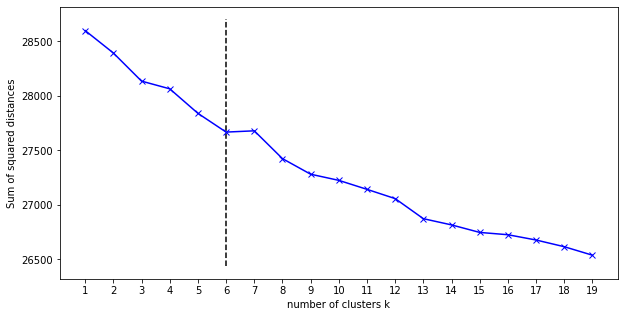

In [ ]:
# Create a line plot.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.xticks( range(1, 20))
plt.plot(K, inertia, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [ ]:
#Enter recommended number of clusters and add k_means as a new column in the dataframe.
# To not bluntly belive in the recommended cluster size, I hoped to try other cluster sizes as well but due to computational and time limitations, I had to skip this step.
clusters = 6
kmeanModel = KMeans(n_clusters=clusters, init='k-means++', max_iter=3000, random_state=0)
mod = kmeanModel.fit_transform(tf_idf)
china_sample['k_means'] = kmeanModel.predict(tf_idf)

In [ ]:
# Top words per cluster (15 per topic)
order_centroids = kmeanModel.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
dict = []
for i in range(clusters):
    print("%d" % i, sep='', end=','),
    for ind in order_centroids[i, :15]:
        print(terms[ind], sep='', end=',')
    print('')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0,news,phone,follow,get,wonderland,xhnews,mobile,smartphone,android,apple,say,launch,world,internet,new,
1,high,firm,new,say,world,market,giant,internet,business,launch,big,startup,year,deal,trade,
2,chinese,company,firm,giant,government,new,american,market,say,foreign,high,investment,data,business,access,
3,approves,linked,receives,trademark,project,trump,high,news,giant,company,say,made,go,report,speech,
4,offer,usb,led,support,ambulance,oxygen,generation,protective,plant,iphone,black,case,dual,red,pc,
5,free,speech,denial,directed,difference,asserting,involving,conspiracy,document,son,page,elaborate,theory,di,nbcnews,


In [ ]:
# Check the cluster sizes!¶
china_sample.groupby('k_means').count().reset_index()[['k_means', 'tweet']]

,k_means,tweet
0,0,1524
1,1,23835
2,2,3510
3,3,110
4,4,482
5,5,539


### TF-IDF & KMeans Clustering India

This section use tf-idf & k-means to analyze the tweets that mention India. Recall the overall research goal was to find how tech is discussed (framed) in Chinese adn Indian seettings. TF-IDF & K-Means Clustering identifies helps us answer that questions by clustering topics which is definied as repeated co-occurance of terms (Nguyen, 2022). Condering that all the tweets are about tech, this method allows us to find topics around the tech frame in Indian context.

In [ ]:
# Only keep the tweets that contains the word "India"
# The code takes into account different variations of the word and case sensitivity.
india_df = df_tweet[df_tweet['tweet'].str.contains(r'\b(india|indian)\b', case=False)]

# Print the tweets that contain the word "India" and its variations.
print("Tweets containing the word 'India':", len(india_df))

# Make sure that the tweets contains only the word "India" due to the reason mentioned above.
india_df = india_df[~india_df['tweet'].str.contains(r'\b(china|chinese)\b', case=False)]

# Print the tweets that contain only the word "India" and its variations.
print("Tweets containing only the word 'India':",len(india_df))

In [ ]:
# There are more 116,000 tweets that mention India. It takes a long time to process this data.
# Even though I used Google Colab for this assignment, it failed a couple times to complete pre-prossing and other tasks.
# Therefore, I decided to take a sample from the data and proceed with that data.
# Select 30,000 random rows from the data frame, with a fixed random seed. 30,000 is a random choice but should be representative.
india_sample = india_df.sample(30000, random_state=42)

In [ ]:
#First, convert the 'tweet' column into strings
india_sample['tweet'] = india_sample['tweet'].astype(str)

In [ ]:
#Function for NLP for separating features (Spacy)
def do_nlp(x):
    doc = nlp(x)
    return doc

#Create new column with words separated
india_sample['text_nlp'] = india_sample['tweet'].apply(lambda x: do_nlp(x))
india_sample.head()

In [ ]:
#Function to include text "features"
def include_features(x):
    include_features = ['VERB', 'NOUN', 'ADJ'] #In this context nouns, adjectives and verbs will probably be most informative. Adverbs and pronouns may not be as relevant for this task. Additioanally, I have computational limits.
    text = ' '.join([ent.text for ent in x if ent.pos_ in include_features])
    return text

india_sample['features'] = india_sample['text_nlp'].apply(lambda x: include_features(x))

In [ ]:
india_sample['features'].head(5)

153299    @anandmahindra represented wid cars team made ...
294764    Strategy data poor nations gaining importance ...
225840            warm welcome Italian look meeting partici
285720                       Reading grey market costs more
208452     Stiff competition awaits takes made G tech world
Name: features, dtype: object

In [ ]:
# Function to clean up the texts (lowercase, remove symbols, numbers, stopwords etc.)
def clean_text(x):
    x = x.lower()
    x: emoji.demojize(x) #Remove emojis from the tweets
    re.sub(r'(http|https)://\S+|@\w+|\d+|#|RT', '',x) #remove URLs, @-mentions, numbers, # symbol and the abbreviation "RT"
    x = x.translate(str.maketrans('', '', string.punctuation)) # Remove punctuations
    # tokenize
    x = nltk.word_tokenize(x)
    x = [token for token in x if token not in stop_words]
    # lemmatization and pass string back
    x = ' '.join([lemmatizer.lemmatize(w) for w in x])
    return x

stop_words = stopwords.words('english')
new_sw = ['ai', 'artificial intelligence', 'tech', 'technology'] #Remove these concepts as they will be common in both China and India tweets and thus, not distinguishing.
stop_words.extend(new_sw)

india_sample['features'] = india_sample['features'].apply(lambda x: clean_text(x))

In [ ]:
india_sample['features'].head(5)

153299    anandmahindra represented wid car team made me...
294764    strategy data poor nation gaining importance team
225840            warm welcome italian look meeting partici
285720                             reading grey market cost
208452           stiff competition awaits take made g world
Name: features, dtype: object

In [ ]:
# Vectorize and calculate TF-IDF!
vectorizer = TfidfVectorizer(min_df=20, max_df=0.4) #Ignore the terms that occur in either too few or too many tweets, as they do not tend to be differentiating.
X = vectorizer.fit_transform(india_sample['features'])
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!pip install kneed #not available colab
from kneed import KneeLocator

In [ ]:
inertia = []

K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=0)
    kmeanModel.fit(tf_idf)
    inertia.append(kmeanModel.inertia_)


kn = KneeLocator(K, inertia, curve='convex', direction='decreasing')
print(kn.knee)

11


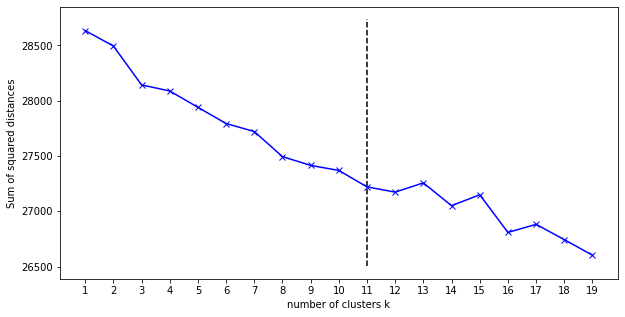

In [ ]:
# Create a line plot.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.xticks( range(1, 20))
plt.plot(K, inertia, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [ ]:
#Enter recommended number of clusters and add k_means as a new column in the dataframe. I decided to look at max 20 clusters as it does not make sense to find more clusters, considering our interest in a signle term 'tech'.
clusters = 11
kmeanModel = KMeans(n_clusters=clusters, init='k-means++', max_iter=3000, random_state=0)
mod = kmeanModel.fit_transform(tf_idf)
india_sample['k_means'] = kmeanModel.predict(tf_idf)

In [ ]:
#Top words per cluster (15 per topic)
order_centroids = kmeanModel.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
dict = []
for i in range(clusters):
    print("%d" % i, sep='', end=','),
    for ind in order_centroids[i, :15]:
        print(terms[ind], sep='', end=',')
    print('')

0,job,indian,year,internet,market,say,top,first,get,user,phone,business,help,high,go,
1,launch,smartphone,tablet,phone,service,today,app,inch,first,set,smartphones,apple,tech2eets,camera,new,
2,news,world,launch,blogger,blog,phone,latest,new,et,technews,stock,price,apple,get,smartphone,
3,world,best,largest,become,first,country,city,biggest,phone,top,innovation,chapter,glorious,1st,upcoming,
4,new,launch,get,rule,platform,boost,post,indian,feature,user,unveils,plan,trade,tie,business,
5,mobile,phone,launch,internet,handset,user,market,app,new,crore,data,manufacturing,news,lakh,number,
6,starting,sale,stunner,worldsfirsttechnology,honorview20,tonight,midnight,grab,alert,shop,wonder,celebrate,feature,set,launch,
7,make,amp,price,coming,91,cut,first,today,get,time,high,smartphone,free,2nd,existence,
8,launched,price,inch,smartphone,camera,news,display,priced,battery,specification,starting,smartphones,feature,tech2eets,variant,
9,company,indian,comply,dictate,law,private,try,legal,profit,p

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Check the cluster sizes!¶
india_sample.groupby('k_means').count().reset_index()[['k_means', 'tweet']]

,k_means,tweet
0,0,21071
1,1,1043
2,2,1091
3,3,774
4,4,1055
5,5,726
6,6,243
7,7,1330
8,8,617
9,9,879


### LDA China

This section use LDA method to analyze the tweets that mention China. Recall the overall research goal was to find how tech is discussed (framed) in Chinese adn Indian seettings. LDA similar to TF-IDF & K-Means helps us answer that questions by focusing topics which is definied as repeated co-occurance of terms (Nguyen, 2022). LDA find topics in the given text. Condering that all the tweets are about tech, this method will allow us to find topics around the tech frame in Chinese context.

In [ ]:
#Use the pre-processed text from the K-Means section.
china_lda = china_sample['features'].copy()
#articles = selection['features'].copy()
china_lda = china_lda.reset_index()

In [ ]:
#Tokenize the texts
china_lda['features'] =  china_lda['features'].apply(word_tokenize)
china_lda['features'].head()

0    [chinese, robot, becomes, world, first, machin...
1    [reutersbiz, drop, leading, brand, state, purc...
2    [leading, researcher, want, form, hub, compete...
3    [focus, bringing, wellness, child, future, gen...
4    [iceboxdesigns, social, make, audio, interacti...
Name: features, dtype: object

In [ ]:
#Function to remove words - sometimes when exploring the results, some words make the results less informative.
#These can be filtered out with this function.
def remove_sw(x):
    # remove stopwords
    x = [token for token in x if not token in stop_words]
    return x

stop_words = stopwords.words('english')

new_sw = ['ai', 'artificial intelligence', 'tech', 'technology'] #These concepts are not differentiating
stop_words.extend(new_sw)

In [ ]:
china_lda['features'] = china_lda['features'].apply(lambda x: remove_sw(x))

In [ ]:
#Add bigrams and trigrams to docs (only ones that appear 50 times or more in this attepmt, which is a random choice).
bigram = Phrases(china_lda['features'], min_count=50)
for idx in range(len(china_lda['features'])):
    for token in bigram[china_lda['features'][idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            china_lda['features'][idx].append(token)

china_lda.head()

,index,features
0,218013,"[chinese, robot, becomes, world, first, machin..."
1,116774,"[reutersbiz, drop, leading, brand, state, purc..."
2,108124,"[leading, researcher, want, form, hub, compete..."
3,59387,"[focus, bringing, wellness, child, future, gen..."
4,92109,"[iceboxdesigns, social, make, audio, interacti..."


In [ ]:
#Function for calculating coherence scores
def coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating for',num_topics,'topics')
        model = LdaModel(corpus=corpus, num_topics=num_topics)
        model_list.append(model)

        #You can adjust the method for coherence here (replace 'c_v' with any other method from the list above)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#create dictionary
id2word = corpora.Dictionary(china_lda['features'])


#Filter out words that occur in less than 20 documents or more than 50% of the documents. These hyperparameter values aim to exclude non-informative data.
id2word.filter_extremes(no_below=10, no_above=0.4)

#Create corpus
corpus = [id2word.doc2bow(doc) for doc in china_lda['features']]

start = 5
limit = 20
step = 1

model_list, coherence_values = coherence_values(dictionary=id2word, corpus=corpus, texts=china_lda['features'], start=start, limit=limit, step=step)

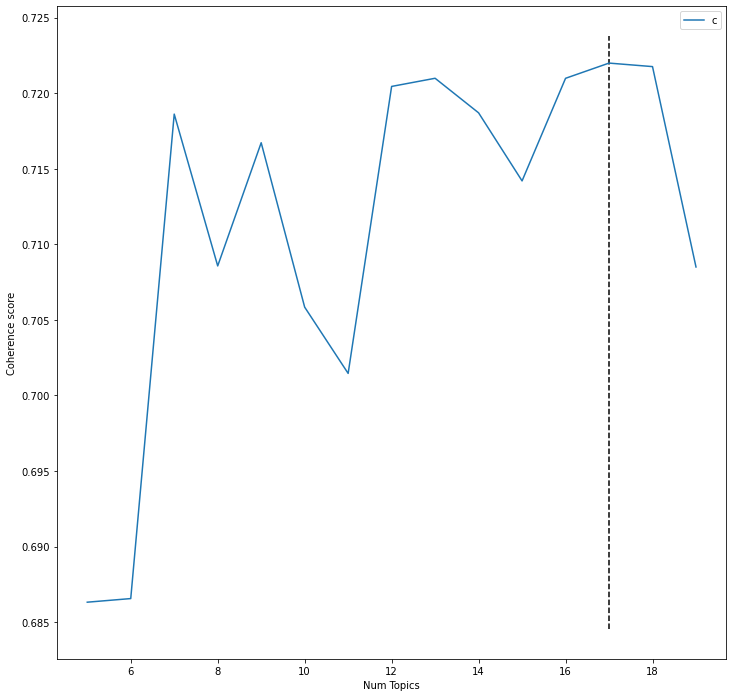

In [ ]:
#Visualise the coherence scores in a plot
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.vlines(x[np.argmax(coherence_values)], plt.ylim()[0], plt.ylim()[1],linestyles='dashed')
plt.show()

In [ ]:
coherence_values

In [ ]:
#list the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.6863
Num Topics = 6  has Coherence Value of 0.6866
Num Topics = 7  has Coherence Value of 0.7186
Num Topics = 8  has Coherence Value of 0.7086
Num Topics = 9  has Coherence Value of 0.7167
Num Topics = 10  has Coherence Value of 0.7058
Num Topics = 11  has Coherence Value of 0.7015
Num Topics = 12  has Coherence Value of 0.7205
Num Topics = 13  has Coherence Value of 0.721
Num Topics = 14  has Coherence Value of 0.7187
Num Topics = 15  has Coherence Value of 0.7142
Num Topics = 16  has Coherence Value of 0.721
Num Topics = 17  has Coherence Value of 0.722
Num Topics = 18  has Coherence Value of 0.7218
Num Topics = 19  has Coherence Value of 0.7085


In [ ]:
#Adjust num_topics to nmuber of topics with highest coherence score. Check if the results are intepretable as topics.
#It perfectly fine to try different numbers of topics as coherence score merely offer orientation but do not necessarily indicate clear topics.
model = LdaModel(corpus=corpus, num_topics=11,id2word=id2word)
model.print_topics()

[(0,
  '0.022*"want" + 0.019*"sale" + 0.017*"report" + 0.017*"startup" + 0.015*"today" + 0.015*"big" + 0.014*"say" + 0.014*"year" + 0.014*"company" + 0.014*"first"'),
 (1,
  '0.045*"business" + 0.031*"e_commerce" + 0.026*"supply_chain" + 0.022*"son_business" + 0.021*"e" + 0.020*"elaborate_conspiracy" + 0.020*"nbcnews_page" + 0.020*"theory_involving" + 0.020*"document_asserting" + 0.020*"made"'),
 (2,
  '0.042*"news" + 0.034*"offer" + 0.025*"phone" + 0.025*"chinese" + 0.025*"mobile" + 0.019*"smartphone" + 0.017*"market" + 0.017*"get" + 0.013*"g" + 0.012*"time"'),
 (3,
  '0.023*"firm" + 0.021*"trump" + 0.019*"approves_trademark" + 0.017*"trade_war" + 0.016*"war" + 0.015*"trade" + 0.014*"leading" + 0.013*"security" + 0.013*"trump_linked" + 0.013*"project_receives"'),
 (4,
  '0.031*"facial_recognition" + 0.026*"new" + 0.026*"high" + 0.022*"free_turn" + 0.018*"system" + 0.018*"build" + 0.017*"building" + 0.016*"built_brand" + 0.016*"including" + 0.015*"gadget"'),
 (5,
  '0.043*"company" + 0

### LDA India

This section use LDA method to analyze the tweets that mention India. Recall the overall research goal was to find how tech is discussed (framed) in Chinese adn Indian seettings. LDA similar to TF-IDF & K-Means helps us answer that questions by focusing topics which is definied as repeated co-occurance of terms (Nguyen, 2022). LDA find topics in the given text. Condering that all the tweets are about tech, this method will allow us to find topics around the tech frame in Indian context.

In [ ]:
#Use the pre-processed text from the dataframes - first try with the full dataset, then the selection
india_lda = india_sample['features'].copy()
#articles = selection['features'].copy()
india_lda = india_lda.reset_index()

In [ ]:
#Tokenize the texts - there are different methods that students learned about. This one uses NLTK.
india_lda['features'] =  india_lda['features'].apply(word_tokenize)
india_lda['features'].head()

In [ ]:
#Function to remove words - sometimes when exploring the results, some words make the results less informative.
#These can be filtered out with this function.
def remove_sw(x):
    # remove stopwords
    x = [token for token in x if not token in stop_words]
    return x

stop_words = stopwords.words('english')

#I noticed some words that messed with the results, so I removed them via stopwords. Students need to figure this out themselves!
new_sw = ['ai', 'artificial intelligence', 'tech', 'technology']
stop_words.extend(new_sw)

In [ ]:
india_lda['features'] = india_lda['features'].apply(lambda x: remove_sw(x))

In [ ]:
#Add bigrams and trigrams to docs (only ones that appear 50 times or more in this attepmt, which is a random choice).
bigram = Phrases(india_lda['features'], min_count=50)
for idx in range(len(india_lda['features'])):
    for token in bigram[india_lda['features'][idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            india_lda['features'][idx].append(token)

india_lda.head()

In [ ]:
#Function for calculating coherence scores
def coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating for',num_topics,'topics')
        model = LdaModel(corpus=corpus, num_topics=num_topics)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#create dictionary
id2word = corpora.Dictionary(india_lda['features'])


#Filter out words that occur in less than 20 documents or more than 50% of the documents. These hyperparameter values aim to exclude non-informative data.
id2word.filter_extremes(no_below=10, no_above=0.4)

#Create corpus
corpus = [id2word.doc2bow(doc) for doc in india_lda['features']]

start = 5
limit = 20
step = 1

model_list, coherence_values = coherence_values(dictionary=id2word, corpus=corpus, texts=india_lda['features'], start=start, limit=limit, step=step)

Calculating for 5 topics


Calculating for 6 topics


Calculating for 7 topics


Calculating for 8 topics


Calculating for 9 topics


Calculating for 10 topics


Calculating for 11 topics


Calculating for 12 topics


Calculating for 13 topics


Calculating for 14 topics


Calculating for 15 topics


Calculating for 16 topics


Calculating for 17 topics


Calculating for 18 topics


Calculating for 19 topics


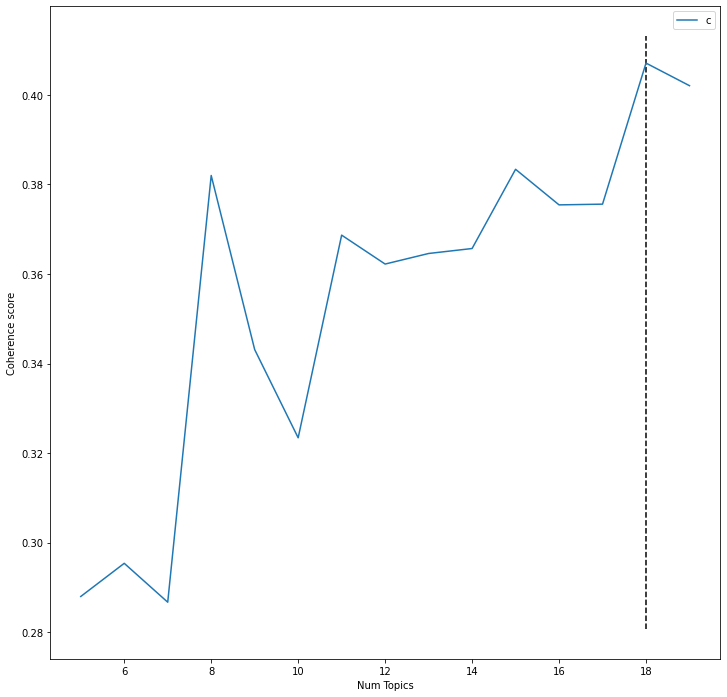

In [ ]:
#Visualise the coherence scores in a plot
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.vlines(x[np.argmax(coherence_values)], plt.ylim()[0], plt.ylim()[1],linestyles='dashed')
plt.show()

In [ ]:
coherence_values

[0.2879549398734709,
 0.29536399269226404,
 0.2866791774895287,
 0.38201309697671737,
 0.34311657004473145,
 0.32340870555310547,
 0.36868538369644166,
 0.3622242155533321,
 0.3645856628789587,
 0.36569564343688593,
 0.3833939701445763,
 0.3754453588730916,
 0.3756068905209264,
 0.4071234681038563,
 0.4020746002026707]

In [ ]:
#list the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.288
Num Topics = 6  has Coherence Value of 0.2954
Num Topics = 7  has Coherence Value of 0.2867
Num Topics = 8  has Coherence Value of 0.382
Num Topics = 9  has Coherence Value of 0.3431
Num Topics = 10  has Coherence Value of 0.3234
Num Topics = 11  has Coherence Value of 0.3687
Num Topics = 12  has Coherence Value of 0.3622
Num Topics = 13  has Coherence Value of 0.3646
Num Topics = 14  has Coherence Value of 0.3657
Num Topics = 15  has Coherence Value of 0.3834
Num Topics = 16  has Coherence Value of 0.3754
Num Topics = 17  has Coherence Value of 0.3756
Num Topics = 18  has Coherence Value of 0.4071
Num Topics = 19  has Coherence Value of 0.4021


In [ ]:
#Adjust num_topics to nmuber of topics with highest coherence score. Check if the results are intepretable as topics.
#It perfectly fine to try different numbers of topics as coherence score merely offer orientation but do not necessarily indicate clear topics.
model = LdaModel(corpus=corpus, num_topics=11,id2word=id2word)
model.print_topics()

[(0,
  '0.038*"top" + 0.017*"look" + 0.016*"call" + 0.015*"win" + 0.013*"space" + 0.013*"ban" + 0.012*"apps" + 0.012*"company" + 0.012*"face" + 0.011*"answer"'),
 (1,
  '0.037*"year" + 0.029*"internet" + 0.024*"data" + 0.021*"user" + 0.019*"next" + 0.017*"medium" + 0.017*"social" + 0.014*"job" + 0.013*"social_medium" + 0.012*"growing"'),
 (2,
  '0.026*"startup" + 0.024*"support" + 0.017*"investment" + 0.013*"cloud" + 0.013*"sector" + 0.012*"good" + 0.012*"innovation" + 0.011*"global" + 0.011*"web" + 0.011*"talk"'),
 (3,
  '0.040*"launched" + 0.039*"r" + 0.032*"launch" + 0.030*"smartphone" + 0.027*"market" + 0.025*"price" + 0.024*"phone" + 0.022*"mobile" + 0.016*"go" + 0.016*"smartphones"'),
 (4,
  '0.062*"sale" + 0.057*"g" + 0.048*"starting" + 0.034*"set" + 0.031*"feature" + 0.022*"wonder" + 0.022*"celebrate" + 0.022*"shop" + 0.020*"alert" + 0.020*"grab"'),
 (5,
  '0.027*"today" + 0.024*"new" + 0.023*"indian" + 0.019*"time" + 0.018*"government" + 0.018*"first" + 0.017*"news" + 0.013*"t

## Question 2.3

*Discuss your results critically:*

1.   *What can we learn about the dicussion of technologies in the Indian and Chinese cases?*
2.   *What are the limitations of your chosen methods but also the data?*

*The written answers should not exceed 500 words in total.*

**TF-IDF & K-Means Clustering:**

Looking at the first few topic sets, tweets from Chineese case seem to be more about business. On the other the tweets from the Indian case apper to be more about sales of technological tools. Although tweets from both case include a lot of smartphone related concepts, this seems to be more dominant in the Indian tweets. The later topics align with what I've just said. In the Chinese case, we continue seeing topics around business concepts such as startup, market and compnay. However, the presence of portable electronics reduces. More interestingly, the latter tweets reflects the signs of Covid-19 pandemic. On the other hand, The Indian tweets continues to be about technological devices such smartphone or tablet.

**LDA:**

In the LDA model, Chinese tweets are contain more signs of business and less sign of portable electronics. Additionally, in the LDA model, the number of topics are higher for China. On the other hand, for the Indian case, there is way less concepts related to phone, table or mobile. For the Indian tweets, the topics seems to be more diverse in LDA.  


**Limitations:**
Starting with the data, I had to use a sample of the data instead of the whole data due to computational and time limitations. Although, I feel comfortable with the representability of the data, it could prove better to use the whole data. However, even if I used the whole data, the results might not be globally optimal as the data is collected from a signle resouce, twitter, which is used by certain part of the population. Moving to the model limitations, K-Means Clustering requires us to determine cluster sice beforehand. Since this model use tf-idf, it also does not take into account the context words or order. Moving to LDA model, this model is sensitive to hyperparemter choices. LDA assumes there is a fixed number of topics. Choosing the wrong number of topics can result in suboptimal outcomes.



# Task 3 (20 points)

### Question 3.1

The file Q3_clickbait.csv contains ca. 32.000 articles titles that were labelled for either “clickbait” or “no-clickbait” (binary labelling, 1= “clickbait”, 0= “no-clickbait”). Your task is to dive a bit deeper into what features make a title "clickbait".

Identify the top 15 NOUNS most strongly associated with “clickbait”. Choose a method for pre-processing the texts prior to analysis that allows you to do this. Discuss and explain why these words are indicative for the “clickbait” category (or why not). Does it make sense to focus on NOUNS only?

In [ ]:
path = "/content/drive/MyDrive/INFOMCDMMC/Q3_clickbait.csv"
df_q3 = pd.read_csv(path)
df_q3.head()

In [ ]:
#First, convert the 'tweet' column into strings
df_q3['title'] = df_q3['title'].astype(str)

#Function for NLP for separating features (Spacy)
def do_nlp(x):
    doc = nlp(x)
    return doc

#Create new column with words separated
df_q3['title_nlp'] = df_q3['title'].apply(lambda x: do_nlp(x))
df_q3.head()


#Function to include only nouns
def include_features(x):
    include_features = ['NOUN'] #extract the nouns
    text = ' '.join([ent.text for ent in x if ent.pos_ in include_features])
    return text

df_q3['features'] = df_q3['title_nlp'].apply(lambda x: include_features(x))
df_q3['features'].head()


# Clean up the texts (lowercase, remove symbols, numbers, stopwords etc.)
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

def clean_text(x):
    x = x.lower()
    re.sub(r'\s+', '', x) #remove white space
    x = x.translate(str.maketrans('', '', string.punctuation)) #most punctuations have been removed in step A.3
    # tokenize
    x = nltk.word_tokenize(x)
    x = [token for token in x if token not in stop_words]
    # lemmatization and pass string back
    x = ' '.join([lemmatizer.lemmatize(w) for w in x])
    return x


df_q3['features'] = df_q3['features'].apply(lambda x: clean_text(x))

# Remove empty strings from the features column
df_q3 = df_q3[df_q3['features'] != '']

df_q3['features'].head()

In [ ]:
# Create a new data frame out of article titles that were labelled 'clickbait'.
df_clickbait = df_q3[df_q3.label == 1]

In [ ]:
# Show the 15 most frequent words
from collections import Counter
tokenized_text = df_clickbait['features'].values
word_counts = Counter(tokenized_text)
print("These are the most common adjectives:", word_counts.most_common()[:15])


[('thing', 466),
 ('people', 288),
 ('sign', 171),
 ('time', 151),
 ('life', 142),
 ('photo', 111),
 ('question', 94),
 ('reason', 88),
 ('year', 83),
 ('character', 81),
 ('way', 81),
 ('picture', 79),
 ('thing people', 71),
 ('test', 64),
 ('woman', 58)]

Question 3.2¶

####LDA Clickbait

In [ ]:
#Tokenize the texts
df_clickbait['features'] =  df_clickbait['features'].apply(word_tokenize)
df_clickbait['features'].head()

In [ ]:
#Function for calculating coherence scores
def coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating for',num_topics,'topics')
        model = LdaModel(corpus=corpus, num_topics=num_topics)
        model_list.append(model)


        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#create dictionary
id2word = corpora.Dictionary(df_clickbait['features'])


#Filter out words that occur in less than 20 documents or more than 50% of the documents. These hyperparameter values aim to exclude non-informative data.
id2word.filter_extremes(no_below=10, no_above=0.4)

#Create corpus
corpus = [id2word.doc2bow(doc) for doc in df_clickbait['features']]
#corpus = [dictionary.doc2bow(doc) for doc in articles['features']]

start = 5
limit = 20
step = 1

model_list, coherence_values = coherence_values(dictionary=id2word, corpus=corpus, texts=df_non_clickbait['features'], start=start, limit=limit, step=step)

In [ ]:
#Visualise the coherence scores in a plot
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.vlines(x[np.argmax(coherence_values)], plt.ylim()[0], plt.ylim()[1],linestyles='dashed')
plt.show()

In [ ]:
coherence_values

In [ ]:
#list the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
# Topics
model = LdaModel(corpus=corpus, num_topics=11,id2word=id2word)
model.print_topics()

More about popular culture, happy topics.

####LDA Non-Clickbait

In [ ]:
# Extract and clean non-clickbait
df_non_clickbait = df_q3[df_q3.label == 0]

In [ ]:
df_non_clickbait.head()

In [ ]:
#Tokenize the texts - there are different methods that students learned about. This one uses NLTK.
df_non_clickbait['features'] =  df_non_clickbait['features'].apply(word_tokenize)
df_non_clickbait['features'].head()

In [ ]:
#Function for calculating coherence scores
def coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating for',num_topics,'topics')
        model = LdaModel(corpus=corpus, num_topics=num_topics)
        model_list.append(model)


        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#create dictionary
id2word = corpora.Dictionary(df_non_clickbait['features'])

#Create a dictionary representation of the documents.
#dictionary = Dictionary(articles['features'])

#Filter out words that occur in less than 20 documents or more than 50% of the documents. These hyperparameter values aim to exclude non-informative data.
id2word.filter_extremes(no_below=10, no_above=0.4)

#Create corpus
corpus = [id2word.doc2bow(doc) for doc in df_non_clickbait['features']]
#corpus = [dictionary.doc2bow(doc) for doc in articles['features']]

start = 5
limit = 20
step = 1

model_list, coherence_values = coherence_values(dictionary=id2word, corpus=corpus, texts=df_non_clickbait['features'], start=start, limit=limit, step=step)

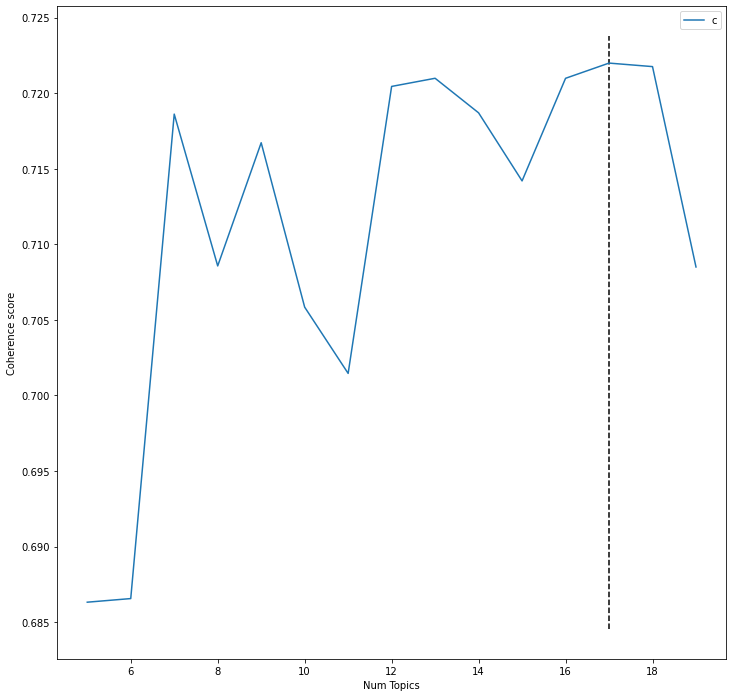

In [ ]:
#Visualise the coherence scores in a plot
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.vlines(x[np.argmax(coherence_values)], plt.ylim()[0], plt.ylim()[1],linestyles='dashed')
plt.show()

In [ ]:
coherence_values

[0.6863150878329891,
 0.6865546846815956,
 0.7186203850148826,
 0.7085721053115723,
 0.7167255612994646,
 0.7058439635302644,
 0.7014586577793289,
 0.7204528441664072,
 0.7209924566059654,
 0.7187050785167006,
 0.7141998813310291,
 0.7209901741984437,
 0.721997632927672,
 0.7217646330539866,
 0.7085022945345453]

In [ ]:
#list the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.6863
Num Topics = 6  has Coherence Value of 0.6866
Num Topics = 7  has Coherence Value of 0.7186
Num Topics = 8  has Coherence Value of 0.7086
Num Topics = 9  has Coherence Value of 0.7167
Num Topics = 10  has Coherence Value of 0.7058
Num Topics = 11  has Coherence Value of 0.7015
Num Topics = 12  has Coherence Value of 0.7205
Num Topics = 13  has Coherence Value of 0.721
Num Topics = 14  has Coherence Value of 0.7187
Num Topics = 15  has Coherence Value of 0.7142
Num Topics = 16  has Coherence Value of 0.721
Num Topics = 17  has Coherence Value of 0.722
Num Topics = 18  has Coherence Value of 0.7218
Num Topics = 19  has Coherence Value of 0.7085


In [ ]:
# Topics
model = LdaModel(corpus=corpus, num_topics=11,id2word=id2word)
model.print_topics()

LDA for Non-clickbait contains topics more about politcs, terrorism. In general, more globally oriented topics. One disadvanatge with LDA is that it does not take into account context.

# Task Four (30 points)

The file Q4_english_cleaned_lyrics.csv contains the lyrics for 218.209 songs in English. The dataset also has columns for the song title, artist, year, and genre.

## Question 4.1

Your first task is to investigate whether we can build a classifer to identify pop songs from other music genres, based on lyrics. In your answer below please make clear


1.   which method you use
2.   justify your choice
3.   what steps you take

I used logistic regression to build a classifer to identify pop songs. There are several factors that justify my decision. First,  logistic regression is a simple and efficient algorithm for classification tasks. It is also easy to implement and can be trained quickly on large datasets. Thus, I hoped to avoid any potential computational problems. Find the steps as commented in the code.

In [ ]:
# Get data
path = '/Q4_english_cleaned_lyrics.csv'
df_lyrics = pd.read_csv(path)
df_lyrics.head()

In [ ]:
# Labels lyrics as Pop(1) and Non-Pop(0).
df_lyrics['label'] = df_lyrics['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

In [ ]:
#Simple logistic regression
from sklearn.model_selection import train_test_split

X = list(df_lyrics.lyrics.values)
y = list(df_lyrics.label.values) # the labels we want to predict --> Y
labels = ['Pop', 'non-Pop']

X_train_str, X_test_str, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#Vectorize the lyrics -- raw counts BOW
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() # this initializes the CountVectorizer
cv.fit(X_train_str) # create the vocabulary

X_train = cv.transform(X_train_str)
X_test = cv.transform(X_test_str)

In [ ]:
print(X_train.toarray()[0])

[0 0 0 ... 0 0 0]


In [ ]:
#View results with CounterVectorizer - comes with its own tokenizer!
vocabulary = cv.get_feature_names()
vectorized_texts = pd.DataFrame(X_train.toarray(), columns=vocabulary)
vectorized_texts.head(5)

In [ ]:
#Raw counts & stop words - fit the CountVectorizer on the training set again afterwards!
from sklearn.feature_extraction.text import CountVectorizer

stop_words = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where', "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't", 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']

MIN_DF = 5 # only keep words that occur more than five times becuase these words are not infomartive enough to build a classifier.
MAX_DF = 0.6 # only keep words that occur in less then 60% of the documents because these are not too common and do not help differentiatin classes.

cv = CountVectorizer(stop_words=stop_words,
                      min_df=MIN_DF,
                      max_df=MAX_DF)

cv.fit(X_train_str)

X_train = cv.transform(X_train_str)
X_test = cv.transform(X_test_str)

In [ ]:
#train the model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

In [ ]:
#Evaluate performance - results are likely to not look good but that's the point.
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred,
                          target_names=labels))

              precision    recall  f1-score   support

         Pop       0.90      0.92      0.91      2601
     non-Pop       0.38      0.33      0.35       412

    accuracy                           0.83      3013
   macro avg       0.64      0.62      0.63      3013
weighted avg       0.82      0.83      0.83      3013



In [ ]:
import random

random_preds = [random.randint(0,1) for i in range(len(y_test))]

print(classification_report(y_test, random_preds,
                          target_names=labels))

              precision    recall  f1-score   support

         Pop       0.86      0.50      0.63      2601
     non-Pop       0.13      0.47      0.20       412

    accuracy                           0.50      3013
   macro avg       0.49      0.48      0.42      3013
weighted avg       0.76      0.50      0.57      3013



In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[2381  220]
 [ 278  134]]


In [ ]:
vocabulary = cv.get_feature_names()
regression_coefficients = lr.coef_[0] # get the LR weights
vocab_coef_combined = list(zip(regression_coefficients, vocabulary)) # this combines two separate lists [1, 2], ['word1', 'word2'] into one list [[1, 'word1'], [2, 'word2']]

feature_importance = pd.DataFrame(vocab_coef_combined,
                      columns=['coef', 'word'])
feature_importance.sort_values('coef', ascending=False).head(10)

## Question 4.2

Then consider the new lyrics below (see also file Q4_new_lyrics_text for copy and paste). To what extent can these be considered as a “stereotypical” pop-song in your dataset? Provide an answer based on the results of relevant data analyses and the lyrics themselves.

In [ ]:
new_example = ["The sky breaks open and the rain falls down",
"Oh, and the pain is blinding",
"But we carry on...",
"Seems like the end of everything",
"When the one you love",
"Turns their back on you",
"And the whole world falls down on you...",
"It's the end of the world",
"It's the end of the world",
"Well, I'm holding on...",
"But the world keeps dragging me down...",
"It's the end of the world",
"It's the end of the world",
"Well, I'm holding on...",
"But the world keeps dragging me down...",
"I got my heart on lockdown",
"And my eyes on the lookout",
"But I just know that I'm",
"Never gonna win this",
"They can keep the lights on",
"They can keep the music loud",
"I don't need anything",
"When I got my music",
"And I'm holding on...",
"The sky breaks open and the rain falls down",
"And the pain is blinding",
"But we carry on",
"(They tell you lies)",
"I'm holding on...",
"(They tell you lies)",
"The sky breaks open and the rain falls down",
"Oh, and the pain is blinding",
"But we carry on...",
"Seems like the end of everything",
"When the one you love",
"Turns their back on you",
"And the whole world falls down on you...",
"It's the end of the world",
"It's the end of the world",
"Well, I'm holding on...",
"But the world keeps dragging me down...",
"It's the end of the world",
"It's the end of the world",
"Well, I'm holding on...",
"But the world keeps dragging me down...",
"I got my heart on lockdown",
"And my eyes on the lookout",
"But I just know that I'm",
"Never gonna win this",
"They can keep the lights on",
"They can keep the music loud",
"I don't need anything",
"When I got my music",
"And I'm holding on...",
"The sky breaks open and the rain falls down",
"And the pain is blinding",
"But we carry on",
"(They tell you lies)",
"I'm holding on...",
"(They tell you lies)"]

In [ ]:
# Remove newlines from each string in the list using a list comprehension
new_example = [line.replace("\n", " ") for line in new_example]

# Concatenate the strings in the list into a single string
new_example = " ".join(new_example)

new_example = [new_example]

In [ ]:
# Give the genre of the lyrics. Slide to the left to see the result.
new_example_bow = cv.transform(new_example)

predictions = lr.predict(new_example_bow)
for i, prediction in enumerate(predictions):
    print("{}: {}".format("The lyrics is genre of", labels[prediction]))

The lyrics is genre of: Pop


In [ ]:
prediction_probabilities = lr.predict_proba(new_example_bow)
for i, proba in enumerate(prediction_probabilities):
    probability_not_clickbait = proba[0]
    probability_clickbait = proba[1]
    print("{}: {}% not clickbait; {}% clickbait".format("The lyrics is",
                                                    round(probability_not_clickbait, 3),
                                                    round(probability_clickbait, 3)))

The lyrics is: 0.7% not clickbait; 0.3% clickbait


According to the outcome of logistic regression, the lyrics are considered as %30 stereotypical.

# Reference

Christian Baden, Christian Pipal, Martijn Schoonvelde & Mariken A. C. G van der Velden (2022) Three Gaps in Computational Text Analysis Methods for Social Sciences: A Research Agenda, Communication Methods and Measures, 16:1, 1-18, DOI: 10.1080/19312458.2021.2015574

Nguyen, D. (2022). Lecture Week 2 [PDF slides]. Utrecht University Critical Data Mining of Media Culture Microsoft Teams: https://solisservices.sharepoint.com/:b:/r/sites/CriticalDataMiningofMediaCultureINFOMCDMMC/Shared%20Documents/General/Slides%20Lecture/INFOMCDMMC_Lecture_2.pdf?csf=1&web=1&e=K8AEne

Nguyen, D. (2022). Seminar Exercise 1, 2, 3, 4 [Python codes]. Utrecht University Critical Data Mining of Media Culture

Veerbeek, J. (2021). Data mining. Retrieved from https://jveerbeek.gitlab.io/data-mining/index.html